In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Country-Code.xlsx', 'file4.json', 'file3.json', 'file1.json', 'file2.json', 'zomato.csv', 'file5.json']


In [303]:
# Importing the required libraries
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot
import seaborn as sns
import time
import scipy
plt.style.use("fivethirtyeight")
%matplotlib inline

In [301]:
# Importing the data
data = pd.read_csv("../input/zomato.csv", encoding ="latin-1")
country = pd.read_excel("../input/Country-Code.xlsx")

In [304]:
#Printing out the data
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
n_data = pd.merge(data,country,on="Country Code")

In [305]:
n_data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [8]:
labels = list(n_data.Country.value_counts().index)
values = list(n_data.Country.value_counts().values)
val=[]

In [9]:
"""for i,x in enumerate(values):
    x=(x*100)/max(values)
    values.insert(i,x)"""
maxi =sum(values)

In [10]:
def norm(values):
    li=[]
    maxi=sum(values)
    for i,x in enumerate(values):
        a = (x*100)/maxi
        li.append(a.round(2))
    return(li)

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

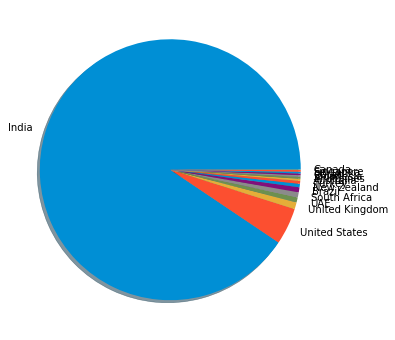

In [11]:
plt.figure(figsize=(6,6))
plt.pie(norm(values),labels=labels,shadow=True)
plt.xticks(rotation=60)

In [12]:
Counter(n_data.Country)

Counter({'Phillipines': 22,
         'Brazil': 60,
         'United States': 434,
         'Australia': 24,
         'Canada': 4,
         'Singapore': 20,
         'UAE': 60,
         'India': 8652,
         'Indonesia': 21,
         'New Zealand': 40,
         'United Kingdom': 80,
         'Qatar': 20,
         'South Africa': 60,
         'Sri Lanka': 20,
         'Turkey': 34})

In [13]:
city_ind = n_data[n_data.Country=="India"]

In [14]:
ind_c_index = city_ind.City.value_counts().index
ind_c_values=  city_ind.City.value_counts().values

In [15]:
get_li= norm(ind_c_values)

([], <a list of 0 Text xticklabel objects>)

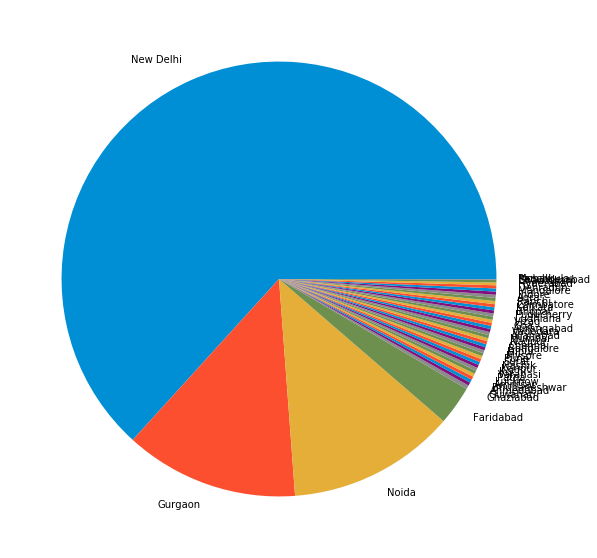

In [16]:
plt.figure(figsize=(10,10))
plt.pie(ind_c_values,labels = ind_c_index)
plt.xticks([])

In [17]:
res_India = n_data[n_data.Country=="India"]

In [18]:
ncr =["New Delhi", "Gurgaon", "Noida", "Faridabad"]
NCR = res_India[(res_India.City==ncr[0]) | (res_India.City==ncr[1]) | (res_India.City==ncr[2]) |(res_India.City==ncr[3])]         

In [19]:
NCR

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4,India
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16,India
867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8,India
868,301729,Raju Dhaba,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,8,India
869,301731,Rakheja Bakery,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,100,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,7,India
870,311053,Snax Points,1,Faridabad,"A-68/5, Near Mehra Petrol Pump, Main Tajpur Ro...",Badarpur Border,"Badarpur Border, Faridabad",77.305383,28.490120,"Chinese, North Indian, Fast Food",300,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4,India
871,9299,Aggarwal Sweet Corner,1,Faridabad,"Badarpur Border Chowk Post, Badarpur Border, F...",Badarpur Border,"Badarpur Border, Faridabad",77.302742,28.496292,Mithai,100,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1,India
872,9178,Kashyap Vaishno Dhaba,1,Faridabad,"Near Seble Cinema, Dharamveer Market, Badarpur...",Badarpur Border,"Badarpur Border, Faridabad",77.303542,28.495915,North Indian,100,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,3,India
873,18477319,Total Food Court,1,Faridabad,"B-222, Shishram Complex, Main Market, Badarpur...",Badarpur Border,"Badarpur Border, Faridabad",0.000000,0.000000,"North Indian, Mughlai, Chinese",400,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,3,India
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,300,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0,India


In [20]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


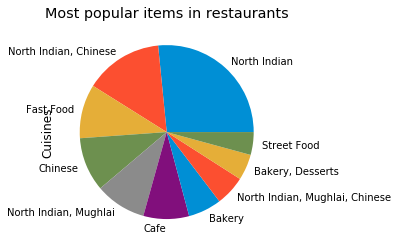

In [21]:
data["Cuisines"].value_counts().sort_values(ascending=False).head(10).plot(kind="pie", title="Most popular items in restaurants")

In [22]:
m=data["Votes"].quantile(0.90)

In [23]:
c=data["Aggregate rating"].mean()

In [24]:
ddf =data.copy().loc[data["Votes"]>=379]

In [25]:
# Function to compute the weightd rating for each restaurants
def weighted_rating(x,m=m,c=c):
    v= x["Votes"]
    r= x["Aggregate rating"]
    return (v/(v+m) * r) + (m/(m+v) * c)

In [26]:
ddf["score"] = ddf.apply(weighted_rating,axis=1)

In [27]:
ddf["score"]

1       3.783561
6       3.437769
7       3.649578
8       4.053454
9       3.912354
10      4.315772
11      3.529590
13      3.505561
19      3.547801
20      3.856733
21      3.802963
103     4.184116
104     3.934083
105     4.034533
106     3.328428
108     3.639225
109     3.614067
111     3.390671
112     3.754016
113     3.707001
115     3.455462
116     3.574332
117     3.510688
118     3.456225
119     3.689680
120     3.955148
121     3.593272
123     3.931345
124     3.986790
125     3.811935
          ...   
9447    3.369493
9456    3.622431
9457    3.867627
9460    3.757411
9461    3.592382
9462    3.712726
9485    3.678991
9486    3.921992
9487    3.427581
9488    3.651656
9489    3.594536
9491    3.534678
9492    4.023410
9493    3.585876
9495    3.814398
9496    3.241293
9537    4.243937
9538    4.304261
9539    3.736117
9540    3.960438
9541    3.737225
9542    3.257349
9543    3.890398
9544    4.242312
9545    3.804287
9546    3.634408
9547    3.788644
9548    3.3233

In [28]:
ddf = ddf.sort_values("score",ascending =False)

In [29]:
ddf[['Restaurant Name','Cuisines', 'Locality','Votes', 'Aggregate rating', 'score']].head(10)

,Restaurant Name,Cuisines,Locality,Votes,Aggregate rating,score
2414,Barbeque Nation,"North Indian, Chinese","Sector 5, Salt Lake",5966,4.9,4.766581
2307,AB's - Absolute Barbecues,"European, Mediterranean, North Indian",Jubilee Hills,5434,4.9,4.754370
728,Toit,"Italian, American, Pizza",Indiranagar,10934,4.8,4.728521
2495,Mirchi And Mime,"North Indian, South Indian, Mughlai",Powai,3244,4.9,4.666341
735,Truffles,"American, Burger, Cafe",Koramangala 5th Block,9667,4.7,4.623278
3013,Naturals Ice Cream,Ice Cream,Connaught Place,2620,4.9,4.617724
374,McGuire's Irish Pub & Brewery,"Burger, Bar Food, Steak",Pensacola,2238,4.9,4.576521
9296,Talaga Sampireun,"Sunda, Indonesian",Pondok Aren,2212,4.9,4.573275
3601,Indian Accent - The Manor,Modern Indian,Friends Colony,1934,4.9,4.534005
591,AB's Absolute Barbecues,"Indian, Continental",Dubai Media City,2510,4.8,4.520095


In [30]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt


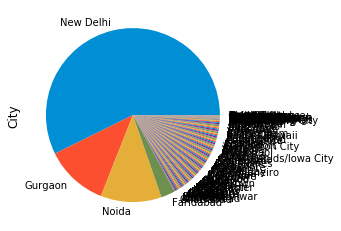

In [31]:
data.City.value_counts().plot(kind="pie")

In [32]:
data_city = data[data["City"]=="New Delhi"]

In [34]:
data_new_delphi=data_city[['Restaurant Name','Cuisines','Locality','Aggregate rating']]

In [35]:
data_new_delphi

,Restaurant Name,Cuisines,Locality,Aggregate rating
2560,Food Cloud,Cuisine Varies,Aaya Nagar,0.0
2561,Burger.in,Fast Food,Adchini,3.2
2562,Days of the Raj,"North Indian, Seafood, Continental",Adchini,3.4
2563,Dilli Ka Dhaba,"South Indian, North Indian",Adchini,2.6
2564,Govardhan,"South Indian, North Indian, Chinese",Adchini,3.4
2565,Mezbaan Grills,Mughlai,Adchini,3.1
2566,Say Cheese,Fast Food,Adchini,2.7
2567,Southy,South Indian,Adchini,2.6
2568,Monosoz,Pizza,Adchini,3.7
2569,Waves,"North Indian, Chinese",Adchini,3.5


In [36]:
data_new_delphi.loc[data['Locality'] == 'Connaught Place']

,Restaurant Name,Cuisines,Locality,Aggregate rating
2999,Amber,"North Indian, Chinese, Mughlai",Connaught Place,2.6
3000,Attitude Kitchen & Bar,"North Indian, Continental, Italian",Connaught Place,2.9
3001,Cafe Coffee Day,Cafe,Connaught Place,3.4
3002,Castle 9,"Finger Food, Continental, North Indian, Chinese",Connaught Place,3.1
3003,Costa Coffee,Cafe,Connaught Place,3.4
3004,Delhi Darbar Dhaba,"North Indian, Chinese",Connaught Place,3.2
3005,Garam Dharam,North Indian,Connaught Place,3.4
3006,Gola Sizzlers,"Chinese, North Indian, Mughlai, Continental",Connaught Place,3.0
3007,Indian Coffee House,Fast Food,Connaught Place,3.3
3008,My Bar Lounge & Restaurant,"North Indian, Chinese, Italian, Continental",Connaught Place,2.7


# Data Analysis

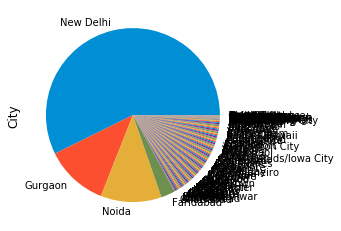

In [39]:
data["City"].value_counts().plot(kind="pie")

#### From the above plot we can estimate that the major portion of the data covers the new delhi region proceeded by Gurgaon and noida

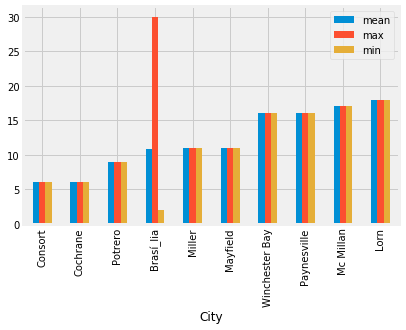

In [40]:
# Average votes from all the major cities
data.groupby("City")["Votes"].agg(["mean","max","min"]).sort_values(by="mean").head(10).plot(kind="bar")

In [41]:
def filter_col(data,col_n):
    for ind,i in enumerate(data[col_n]):
        list_c= str(i).split(",")
        for k,li in enumerate(list_c):
            list_c[k] = li.replace(" ","")
        spl_d = " ".join(list_c[:])

In [42]:
filter_col(data,"Cuisines")

In [257]:
data_n = data[["Restaurant Name","City", "Cuisines","Locality","Average Cost for two", "Price range", "Votes", "Aggregate rating"]]

In [258]:
data_n_delhi= data_n.reset_index().drop("index",axis=1)

In [259]:
data_n_delhi = data_n[data_n["City"]=="New Delhi"]

In [260]:
data_n_delhi =data_n_delhi.reset_index()

In [261]:
data_n_delhi.drop(["index"],axis=1,inplace = True)

In [262]:
mean_avg_cost = data_n_delhi["Average Cost for two"].mean()

In [263]:
data_n_delhi["Average Cost for two"] = data_n_delhi["Average Cost for two"]-mean_avg_cost#

In [264]:
data_n_delhi['Cuisines'] = data_n_delhi['Cuisines'].fillna('')

In [265]:
tfidf = TfidfVectorizer(stop_words='english')

In [266]:
tfidf_matrix = tfidf.fit_transform(data_n_delhi["Cuisines"])

In [267]:
names = tfidf.get_feature_names()

In [268]:
aa= pd.DataFrame(tfidf_matrix.toarray(),columns=names).reset_index().drop(["index"],axis=1)
aa

,afghani,african,american,andhra,arabian,armenian,asian,assamese,awadhi,bakery,bengali,beverages,bihari,biryani,british,burger,burmese,cafe,chettinad,chinese,continental,cream,cuisine,deli,desserts,drinks,eastern,european,fast,finger,food,french,goan,gujarati,healthy,hyderabadi,ice,indian,indonesian,iranian,...,lankan,lebanese,lucknowi,maharashtrian,malaysian,mangalorean,meats,mediterranean,mex,mexican,middle,mithai,modern,moroccan,mughlai,naga,nepalese,north,oriya,pakistani,parsi,pizza,portuguese,rajasthani,raw,salad,sandwich,seafood,south,spanish,sri,street,sushi,tea,tex,thai,tibetan,turkish,varies,vietnamese
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.707107,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.707107,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.751880,0.000000,0.659300,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.495696,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.234398,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.243860,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.799922,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.655229,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.340839,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.674169,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.383232,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.605204,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.314816,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.622698,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.751880,0.000000,0.659300,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.437078,0.0,0.0,...,0.0,0

In [269]:
new_d= pd.concat([data_n_delhi,aa],axis=1).drop(["Cuisines"],axis=1)

In [250]:
new_d

,Restaurant Name,City,Locality,Average Cost for two,Price range,Votes,Aggregate rating,afghani,african,american,andhra,arabian,armenian,asian,assamese,awadhi,bakery,bengali,beverages,bihari,biryani,british,burger,burmese,cafe,chettinad,chinese,continental,cream,cuisine,deli,desserts,drinks,eastern,european,fast,finger,food,french,goan,...,lankan,lebanese,lucknowi,maharashtrian,malaysian,mangalorean,meats,mediterranean,mex,mexican,middle,mithai,modern,moroccan,mughlai,naga,nepalese,north,oriya,pakistani,parsi,pizza,portuguese,rajasthani,raw,salad,sandwich,seafood,south,spanish,sri,street,sushi,tea,tex,thai,tibetan,turkish,varies,vietnamese
0,Food Cloud,New Delhi,Aaya Nagar,-96.088069,2,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.707107,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.707107,0.0
1,Burger.in,New Delhi,Adchini,-246.088069,1,46,3.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.751880,0.000000,0.659300,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
2,Days of the Raj,New Delhi,Adchini,903.911931,3,45,3.4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.495696,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.243860,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.799922,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
3,Dilli Ka Dhaba,New Delhi,Adchini,-96.088069,2,11,2.6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.340839,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.674169,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
4,Govardhan,New Delhi,Adchini,-96.088069,2,238,3.4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.383232,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.314816,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.622698,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
5,Mezbaan Grills,New Delhi,Adchini,-196.088069,1,8,3.1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
6,Say Cheese,New Delhi,Adchini,-196.088069,1,64,2.7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.751880,0.000000,0.659300,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
7,Southy,New Delhi,Adchini,-146.088069,1,113,2.6,0.0,0.0,0.0,0.000000,0.0,0

In [270]:
def weighted_rating(x):
    c= x["Aggregate rating"].mean()
    m= x["Votes"].quantile(0.90)
    v= x["Votes"]
    r= x["Aggregate rating"]
    return ((v/(v+m) * r) + (m/(m+v) * c))

In [271]:
new_d["Weighted_avg"]=weighted_rating(new_d)

In [272]:
new_d.drop(["Votes","City"],axis=1,inplace=True)

In [273]:
new_d.drop(["Average Cost for two"],axis=1,inplace=True)

In [275]:
new_dd =new_d.copy()
new_d.drop(["Restaurant Name","Locality"],axis=1,inplace = True)


In [276]:
new_dd

,Restaurant Name,Locality,Price range,Aggregate rating,afghani,african,american,andhra,arabian,armenian,asian,assamese,awadhi,bakery,bengali,beverages,bihari,biryani,british,burger,burmese,cafe,chettinad,chinese,continental,cream,cuisine,deli,desserts,drinks,eastern,european,fast,finger,food,french,goan,gujarati,healthy,hyderabadi,...,lebanese,lucknowi,maharashtrian,malaysian,mangalorean,meats,mediterranean,mex,mexican,middle,mithai,modern,moroccan,mughlai,naga,nepalese,north,oriya,pakistani,parsi,pizza,portuguese,rajasthani,raw,salad,sandwich,seafood,south,spanish,sri,street,sushi,tea,tex,thai,tibetan,turkish,varies,vietnamese,Weighted_avg
0,Food Cloud,Aaya Nagar,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.707107,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.707107,0.0,2.419161
1,Burger.in,Adchini,1,3.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.751880,0.000000,0.659300,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,2.558835
2,Days of the Raj,Adchini,3,3.4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.495696,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.243860,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.799922,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,2.587580
3,Dilli Ka Dhaba,Adchini,2,2.6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.340839,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.674169,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,2.445748
4,Govardhan,Adchini,2,3.4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.383232,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.314816,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.622698,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,2.911675
5,Mezbaan Grills,Adchini,1,3.1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,2.459685
6,Say Cheese,Adchini,1,2.7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.751880,0.000000,0.659300,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,2.492796
7,Southy,Adchini,1,2.6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0

In [277]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity= pairwise_distances(new_d,metric="cosine")

In [278]:
simi_df = pd.DataFrame(user_similarity)

In [279]:
data_n_delhi.head()

,Restaurant Name,City,Cuisines,Locality,Average Cost for two,Price range,Votes,Aggregate rating
0,Food Cloud,New Delhi,Cuisine Varies,Aaya Nagar,-96.088069,2,2,0.0
1,Burger.in,New Delhi,Fast Food,Adchini,-246.088069,1,46,3.2
2,Days of the Raj,New Delhi,"North Indian, Seafood, Continental",Adchini,903.911931,3,45,3.4
3,Dilli Ka Dhaba,New Delhi,"South Indian, North Indian",Adchini,-96.088069,2,11,2.6
4,Govardhan,New Delhi,"South Indian, North Indian, Chinese",Adchini,-96.088069,2,238,3.4


In [280]:
new_d.drop(["Aggregate rating"],axis=1,inplace= True)

#### Building the recommendation engine which makes the prediction about the hotel using the locaton of the hotel and its name 

In [294]:
def get_recommendation(hotel_name, new_dd, orig_data,top_n,location):
        orig_data = orig_data[orig_data["Locality"]==location].reset_index()
        new_dd = new_dd[new_dd["Locality"]==location]
        new_dd.drop(["Restaurant Name","Locality"],axis=1,inplace = True)
        user_simi_matrix= pairwise_distances(new_dd,metric="cosine")
        user_simi_df=  pd.DataFrame(user_simi_matrix)
        print(user_simi_df.shape)
        print(orig_data.shape)
        index_of_name =  orig_data[orig_data["Restaurant Name"]==hotel_name].index.tolist()[0]
        print(index_of_name)
        final_index = user_simi_df[index_of_name].sort_values(ascending = False)[:top_n].index
        for i  in final_index:
            print(orig_data.iloc[i]["Restaurant Name"])
    
    

In [295]:
get_recommendation("Pizza Hut", new_dd, data_n_delhi,20,"Connaught Place")

(122, 122)
(122, 9)
63
Kettle & Kegs
Shree Hari Vaishnav Dhaba
Ovenstory Pizza
Naturals Ice Cream
Chaayos
South Indian Snacks
Jain Chawal Wale
Wenger's
Wenger's Deli
Moets Arabica
Cafe Coffee Day
Delhi Darbar Dhaba
La Americana
Shake Square
The Rolling Joint
Indian Coffee House
Saravana Bhavan
Starbucks
Bikkgane Biryani
Cha Bar


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

